In [1]:
'''Extrae el archivo zip del dataset'''
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img

%matplotlib inline

In [3]:
!pip install split-folders
import splitfolders
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2)) 

Copying files: 400 files [00:04, 80.43 files/s] 


In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 240 files belonging to 5 classes.
Found 80 files belonging to 5 classes.
Found 80 files belonging to 5 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


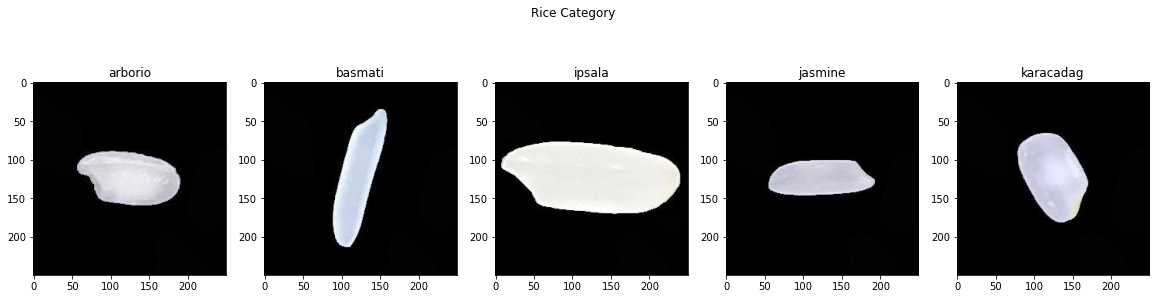

In [6]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_img = img.imread('./dataset/Arborio/Arborio (1).jpg')
basmati_img = img.imread('./dataset//Basmati/Basmati (1).jpg')
ipsala_img = img.imread('./dataset/Ipsala/Ipsala (1).jpg')
jasmine_img = img.imread('./dataset/Jasmine/Jasmine (1).jpg')
karacadag_img = img.imread('./dataset/Karacadag/Karacadag (1).jpg')

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3), input_shape=(128,128,1),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(30,"softmax"))
model.add(keras.layers.Dense(5,"softmax"))

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "RMSprop",metrics=["accuracy"])

In [9]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=64, verbose=1)

Epoch 1/10
4/4 [==============================] - 24s 4s/step - loss: 1.5805 - accuracy: 0.2708 - val_loss: 1.5208 - val_accuracy: 0.3875
Epoch 2/10
4/4 [==============================] - 10s 2s/step - loss: 1.4899 - accuracy: 0.4917 - val_loss: 1.4466 - val_accuracy: 0.6875
Epoch 3/10
4/4 [==============================] - 16s 4s/step - loss: 1.4176 - accuracy: 0.6083 - val_loss: 1.4903 - val_accuracy: 0.4875
Epoch 4/10
4/4 [==============================] - 13s 3s/step - loss: 1.4142 - accuracy: 0.6667 - val_loss: 1.4459 - val_accuracy: 0.6625
Epoch 5/10
4/4 [==============================] - 12s 3s/step - loss: 1.3763 - accuracy: 0.7042 - val_loss: 1.4570 - val_accuracy: 0.5625
Epoch 6/10
4/4 [==============================] - 12s 3s/step - loss: 1.3840 - accuracy: 0.6708 - val_loss: 1.4263 - val_accuracy: 0.7250
Epoch 7/10
4/4 [==============================] - 12s 3s/step - loss: 1.3626 - accuracy: 0.7042 - val_loss: 1.4529 - val_accuracy: 0.4500
Epoch 8/10
4/4 [==================

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0

In [11]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

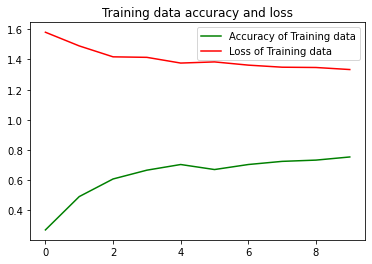

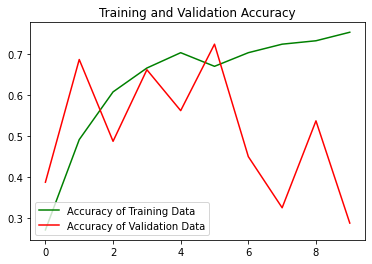

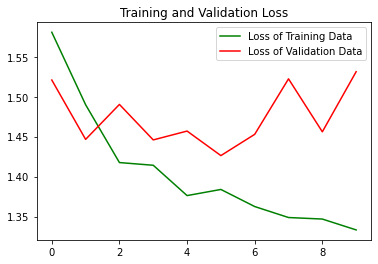

<Figure size 432x288 with 0 Axes>

In [12]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [13]:
loss, accuracy = model.evaluate(test_ds)

2/2 [==============================] - 1s 186ms/step - loss: 1.5307 - accuracy: 0.3000


1/1 [==============================] - 0s 46ms/step


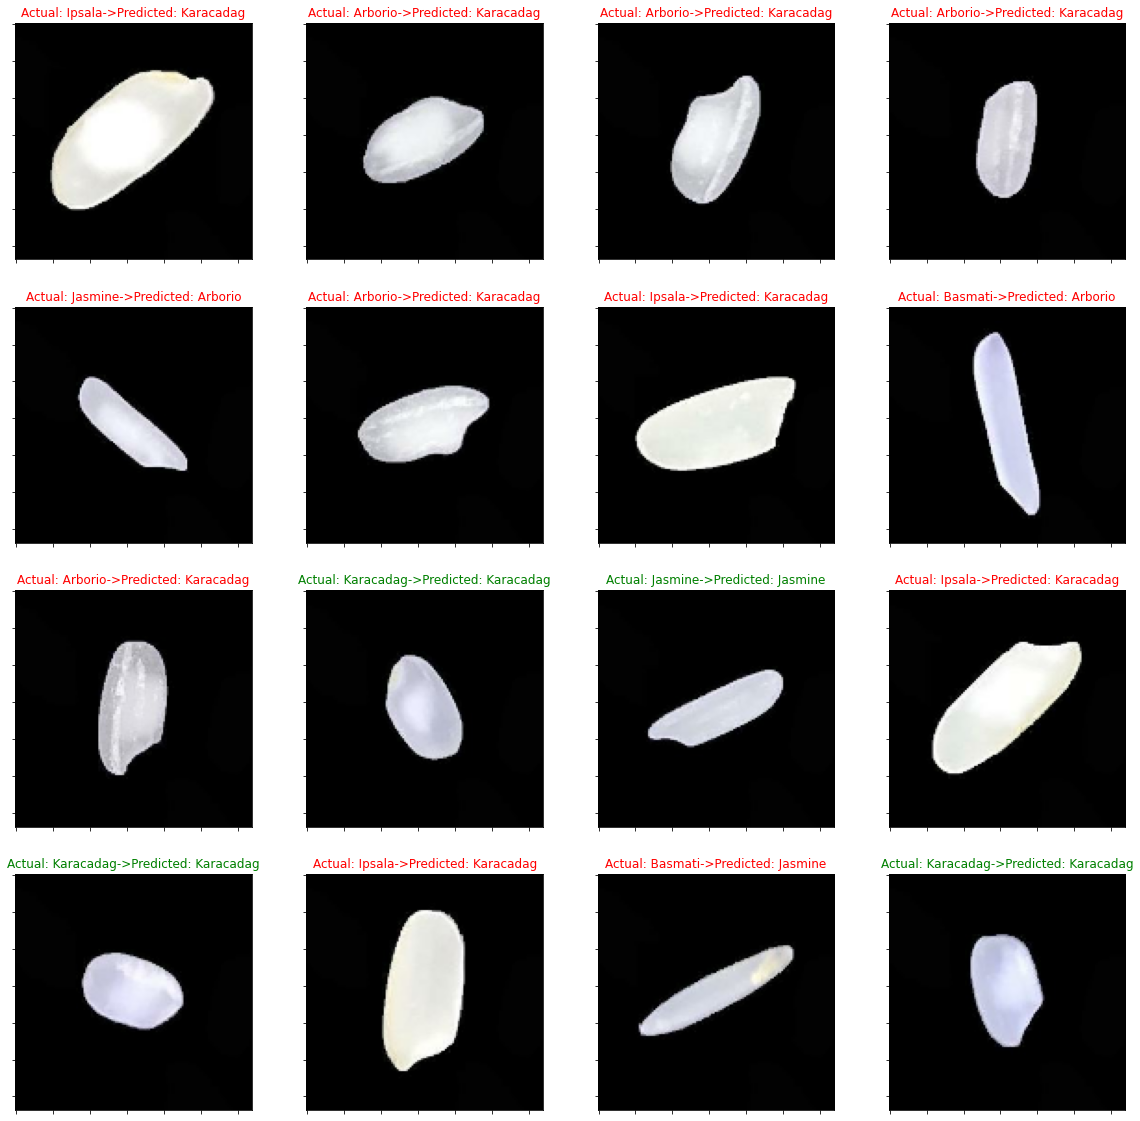

In [14]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])